In [1]:
#Importing libraries
import pyodbc
import pandas as pd
import datawig
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Connecting to SQL Sever 2019
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=.;'
                      'Database=AdventureWorks2017;'
                      'Trusted_Connection=yes;')


#Using set_option function in order to see all rows and columns from dataframe
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 503)

# Creating a query using Pandas
pp_df = pd.read_sql_query('SELECT * FROM Production.Product', conn)
display(pp_df)

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,SizeUnitMeasureCode,WeightUnitMeasureCode,Weight,DaysToManufacture,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,None,1000,750,0.0000,0.00,None,None,None,NaN,0,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,None,1000,750,0.0000,0.00,None,None,None,NaN,0,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
2,3,BB Ball Bearing,BE-2349,True,False,None,800,600,0.0000,0.00,None,None,None,NaN,1,None,None,None,NaN,NaN,2008-04-30,NaT,None,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08 10:01:36.827
3,4,Headset Ball Bearings,BE-2908,False,False,None,800,600,0.0000,0.00,None,None,None,NaN,0,None,None,None,NaN,NaN,2008-04-30,NaT,None,ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B,2014-02-08 10:01:36.827
4,316,Blade,BL-2036,True,False,None,800,600,0.0000,0.00,None,None,None,NaN,1,None,None,None,NaN,NaN,2008-04-30,NaT,None,E73E9750-603B-4131-89F5-3DD15ED5FF80,2014-02-08 10:01:36.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,995,ML Bottom Bracket,BB-8107,True,True,None,500,375,44.9506,101.24,None,None,G,168.00,1,None,M,None,5.0,96.0,2013-05-30,NaT,None,71AB847F-D091-42D6-B735-7B0C2D82FC84,2014-02-08 10:01:36.827
500,996,HL Bottom Bracket,BB-9108,True,True,None,500,375,53.9416,121.49,None,None,G,170.00,1,None,H,None,5.0,97.0,2013-05-30,NaT,None,230C47C5-08B2-4CE3-B706-69C0BDD62965,2014-02-08 10:01:36.827
501,997,"Road-750 Black, 44",BK-R19B-44,True,True,Black,100,75,343.6496,539.99,44,CM,LB,19.77,4,R,L,U,2.0,31.0,2013-05-30,NaT,None,44CE4802-409F-43AB-9B27-CA53421805BE,2014-02-08 10:01:36.827
502,998,"Road-750 Black, 48",BK-R19B-48,True,True,Black,100,75,343.6496,539.99,48,CM,LB,20.13,4,R,L,U,2.0,31.0,2013-05-30,NaT,None,3DE9A212-1D49-40B6-B10A-F564D981DBDE,2014-02-08 10:01:36.827


In [2]:
#Checking the missing data
(pp_df.isna().sum() / len(pp_df['ProductID'])*100).round(2)

ProductID                  0.00
Name                       0.00
ProductNumber              0.00
MakeFlag                   0.00
FinishedGoodsFlag          0.00
Color                     49.21
SafetyStockLevel           0.00
ReorderPoint               0.00
StandardCost               0.00
ListPrice                  0.00
Size                      58.13
SizeUnitMeasureCode       65.08
WeightUnitMeasureCode     59.33
Weight                    59.33
DaysToManufacture          0.00
ProductLine               44.84
Class                     50.99
Style                     58.13
ProductSubcategoryID      41.47
ProductModelID            41.47
SellStartDate              0.00
SellEndDate               80.56
DiscontinuedDate         100.00
rowguid                    0.00
ModifiedDate               0.00
dtype: float64

In [3]:
# Other way to check missing values
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 25 columns):
ProductID                504 non-null int64
Name                     504 non-null object
ProductNumber            504 non-null object
MakeFlag                 504 non-null bool
FinishedGoodsFlag        504 non-null bool
Color                    256 non-null object
SafetyStockLevel         504 non-null int64
ReorderPoint             504 non-null int64
StandardCost             504 non-null float64
ListPrice                504 non-null float64
Size                     211 non-null object
SizeUnitMeasureCode      176 non-null object
WeightUnitMeasureCode    205 non-null object
Weight                   205 non-null float64
DaysToManufacture        504 non-null int64
ProductLine              278 non-null object
Class                    247 non-null object
Style                    211 non-null object
ProductSubcategoryID     295 non-null float64
ProductModelID           295 non-null float6

In [4]:
pp_df.drop('ProductSubcategoryID', axis=1, inplace=True)
pp_df.drop('ProductModelID', axis=1, inplace=True)
pp_df.drop('SellEndDate', axis=1, inplace=True)
pp_df.drop('DiscontinuedDate', axis=1, inplace=True)

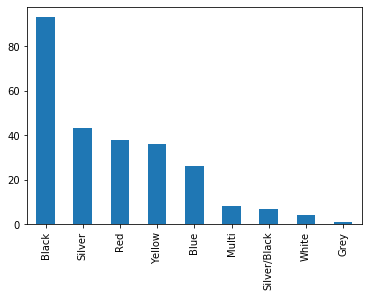

In [5]:
pp_df.Color.value_counts().plot.bar()

In [6]:
#Handling missing values of column Color with Datawig library

df_train, df_test = datawig.utils.random_split(pp_df, split_ratios=[0.7, 0.3])

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    # column(s) containing information about the column we want to impute
    input_columns=['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag','SafetyStockLevel','ReorderPoint','StandardCost',
                  'ListPrice', 'DaysToManufacture'], 
    output_column='Color', # the column we'd like to impute values for
    output_path = 'imputer_model', # stores model data and metrics
    
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2022-02-18 15:32:06,230 [INFO]  CategoricalEncoder for column Color                                found only 59 occurrences of value Black
2022-02-18 15:32:06,231 [INFO]  CategoricalEncoder for column Color                                found only 29 occurrences of value Silver
2022-02-18 15:32:06,231 [INFO]  CategoricalEncoder for column Color                                found only 26 occurrences of value Red
2022-02-18 15:32:06,232 [INFO]  CategoricalEncoder for column Color                                found only 20 occurrences of value Yellow
2022-02-18 15:32:06,232 [INFO]  CategoricalEncoder for column Color                                found only 18 occurrences of value Blue
2022-02-18 15:32:06,233 [INFO]  CategoricalEncoder for column Color                                found only 5 occurrences of value Multi
2022-02-18 15:32:06,234 [INFO]  CategoricalEncoder for column Color                                found only 4 occurrences of value White
2022-02-18 15:32:06,234

2022-02-18 15:32:07,671 [INFO]  Epoch[11] Validation-Color-accuracy=1.000000
2022-02-18 15:32:07,732 [INFO]  Epoch[12] Batch [0-6]	Speed: 1919.96 samples/sec	cross-entropy=0.289224	Color-accuracy=0.991071
2022-02-18 15:32:07,769 [INFO]  Epoch[12] Train-cross-entropy=0.276554
2022-02-18 15:32:07,770 [INFO]  Epoch[12] Train-Color-accuracy=0.988636
2022-02-18 15:32:07,771 [INFO]  Epoch[12] Time cost=0.099
2022-02-18 15:32:07,775 [INFO]  Saved checkpoint to "imputer_model\model-0012.params"
2022-02-18 15:32:07,781 [INFO]  Epoch[12] Validation-cross-entropy=0.344066
2022-02-18 15:32:07,781 [INFO]  Epoch[12] Validation-Color-accuracy=1.000000
2022-02-18 15:32:07,840 [INFO]  Epoch[13] Batch [0-6]	Speed: 1920.05 samples/sec	cross-entropy=0.263863	Color-accuracy=0.991071
2022-02-18 15:32:07,875 [INFO]  Epoch[13] Train-cross-entropy=0.252817
2022-02-18 15:32:07,876 [INFO]  Epoch[13] Train-Color-accuracy=0.988636
2022-02-18 15:32:07,876 [INFO]  Epoch[13] Time cost=0.094
2022-02-18 15:32:07,880 [I

2022-02-18 15:32:09,234 [INFO]  Epoch[26] Train-Color-accuracy=1.000000
2022-02-18 15:32:09,234 [INFO]  Epoch[26] Time cost=0.094
2022-02-18 15:32:09,239 [INFO]  Saved checkpoint to "imputer_model\model-0026.params"
2022-02-18 15:32:09,245 [INFO]  Epoch[26] Validation-cross-entropy=0.163924
2022-02-18 15:32:09,245 [INFO]  Epoch[26] Validation-Color-accuracy=1.000000
2022-02-18 15:32:09,307 [INFO]  Epoch[27] Batch [0-6]	Speed: 1811.31 samples/sec	cross-entropy=0.101772	Color-accuracy=1.000000
2022-02-18 15:32:09,337 [INFO]  Epoch[27] Train-cross-entropy=0.099762
2022-02-18 15:32:09,338 [INFO]  Epoch[27] Train-Color-accuracy=1.000000
2022-02-18 15:32:09,339 [INFO]  Epoch[27] Time cost=0.093
2022-02-18 15:32:09,343 [INFO]  Saved checkpoint to "imputer_model\model-0027.params"
2022-02-18 15:32:09,348 [INFO]  Epoch[27] Validation-cross-entropy=0.157296
2022-02-18 15:32:09,348 [INFO]  Epoch[27] Validation-Color-accuracy=1.000000
2022-02-18 15:32:09,409 [INFO]  Epoch[28] Batch [0-6]	Speed: 19

2022-02-18 15:32:10,828 [INFO]  Epoch[40] Validation-Color-accuracy=1.000000
2022-02-18 15:32:10,895 [INFO]  Epoch[41] Batch [0-6]	Speed: 1745.51 samples/sec	cross-entropy=0.055672	Color-accuracy=1.000000
2022-02-18 15:32:10,932 [INFO]  Epoch[41] Train-cross-entropy=0.055106
2022-02-18 15:32:10,933 [INFO]  Epoch[41] Train-Color-accuracy=1.000000
2022-02-18 15:32:10,934 [INFO]  Epoch[41] Time cost=0.106
2022-02-18 15:32:10,938 [INFO]  Saved checkpoint to "imputer_model\model-0041.params"
2022-02-18 15:32:10,945 [INFO]  Epoch[41] Validation-cross-entropy=0.097396
2022-02-18 15:32:10,946 [INFO]  Epoch[41] Validation-Color-accuracy=1.000000
2022-02-18 15:32:11,008 [INFO]  Epoch[42] Batch [0-6]	Speed: 1846.24 samples/sec	cross-entropy=0.053724	Color-accuracy=1.000000
2022-02-18 15:32:11,055 [INFO]  Epoch[42] Train-cross-entropy=0.053196
2022-02-18 15:32:11,056 [INFO]  Epoch[42] Train-Color-accuracy=1.000000
2022-02-18 15:32:11,057 [INFO]  Epoch[42] Time cost=0.111
2022-02-18 15:32:11,076 [I

2022-02-18 15:32:12,562 [INFO]  Epoch[55] Train-Color-accuracy=1.000000
2022-02-18 15:32:12,562 [INFO]  Epoch[55] Time cost=0.099
2022-02-18 15:32:12,567 [INFO]  Saved checkpoint to "imputer_model\model-0055.params"
2022-02-18 15:32:12,573 [INFO]  Epoch[55] Validation-cross-entropy=0.068023
2022-02-18 15:32:12,573 [INFO]  Epoch[55] Validation-Color-accuracy=1.000000
2022-02-18 15:32:12,653 [INFO]  Epoch[56] Batch [0-6]	Speed: 1391.35 samples/sec	cross-entropy=0.034773	Color-accuracy=1.000000
2022-02-18 15:32:12,696 [INFO]  Epoch[56] Train-cross-entropy=0.034613
2022-02-18 15:32:12,697 [INFO]  Epoch[56] Train-Color-accuracy=1.000000
2022-02-18 15:32:12,697 [INFO]  Epoch[56] Time cost=0.123
2022-02-18 15:32:12,704 [INFO]  Saved checkpoint to "imputer_model\model-0056.params"
2022-02-18 15:32:12,712 [INFO]  Epoch[56] Validation-cross-entropy=0.066507
2022-02-18 15:32:12,713 [INFO]  Epoch[56] Validation-Color-accuracy=1.000000
2022-02-18 15:32:12,793 [INFO]  Epoch[57] Batch [0-6]	Speed: 14

2022-02-18 15:32:14,248 [INFO]  Epoch[69] Validation-Color-accuracy=1.000000
2022-02-18 15:32:14,307 [INFO]  Epoch[70] Batch [0-6]	Speed: 1920.03 samples/sec	cross-entropy=0.024548	Color-accuracy=1.000000
2022-02-18 15:32:14,341 [INFO]  Epoch[70] Train-cross-entropy=0.024512
2022-02-18 15:32:14,342 [INFO]  Epoch[70] Train-Color-accuracy=1.000000
2022-02-18 15:32:14,343 [INFO]  Epoch[70] Time cost=0.095
2022-02-18 15:32:14,346 [INFO]  Saved checkpoint to "imputer_model\model-0070.params"
2022-02-18 15:32:14,352 [INFO]  Epoch[70] Validation-cross-entropy=0.049951
2022-02-18 15:32:14,353 [INFO]  Epoch[70] Validation-Color-accuracy=1.000000
2022-02-18 15:32:14,410 [INFO]  Epoch[71] Batch [0-6]	Speed: 1999.96 samples/sec	cross-entropy=0.024011	Color-accuracy=1.000000
2022-02-18 15:32:14,442 [INFO]  Epoch[71] Train-cross-entropy=0.023979
2022-02-18 15:32:14,443 [INFO]  Epoch[71] Train-Color-accuracy=1.000000
2022-02-18 15:32:14,443 [INFO]  Epoch[71] Time cost=0.090
2022-02-18 15:32:14,447 [I

2022-02-18 15:32:15,775 [INFO]  Epoch[84] Train-Color-accuracy=1.000000
2022-02-18 15:32:15,776 [INFO]  Epoch[84] Time cost=0.094
2022-02-18 15:32:15,780 [INFO]  Saved checkpoint to "imputer_model\model-0084.params"
2022-02-18 15:32:15,785 [INFO]  Epoch[84] Validation-cross-entropy=0.039167
2022-02-18 15:32:15,786 [INFO]  Epoch[84] Validation-Color-accuracy=1.000000
2022-02-18 15:32:15,846 [INFO]  Epoch[85] Batch [0-6]	Speed: 1959.30 samples/sec	cross-entropy=0.017985	Color-accuracy=1.000000
2022-02-18 15:32:15,876 [INFO]  Epoch[85] Train-cross-entropy=0.018004
2022-02-18 15:32:15,876 [INFO]  Epoch[85] Train-Color-accuracy=1.000000
2022-02-18 15:32:15,877 [INFO]  Epoch[85] Time cost=0.090
2022-02-18 15:32:15,881 [INFO]  Saved checkpoint to "imputer_model\model-0085.params"
2022-02-18 15:32:15,887 [INFO]  Epoch[85] Validation-cross-entropy=0.038548
2022-02-18 15:32:15,888 [INFO]  Epoch[85] Validation-Color-accuracy=1.000000
2022-02-18 15:32:15,945 [INFO]  Epoch[86] Batch [0-6]	Speed: 20

2022-02-18 15:32:17,274 [INFO]  Epoch[98] Validation-Color-accuracy=1.000000
2022-02-18 15:32:17,339 [INFO]  Epoch[99] Batch [0-6]	Speed: 1745.46 samples/sec	cross-entropy=0.014003	Color-accuracy=1.000000
2022-02-18 15:32:17,374 [INFO]  Epoch[99] Train-cross-entropy=0.014040
2022-02-18 15:32:17,375 [INFO]  Epoch[99] Train-Color-accuracy=1.000000
2022-02-18 15:32:17,375 [INFO]  Epoch[99] Time cost=0.100
2022-02-18 15:32:17,380 [INFO]  Saved checkpoint to "imputer_model\model-0099.params"
2022-02-18 15:32:17,386 [INFO]  Epoch[99] Validation-cross-entropy=0.031272
2022-02-18 15:32:17,387 [INFO]  Epoch[99] Validation-Color-accuracy=1.000000
2022-02-18 15:32:17,388 [INFO]  
========== done (11.01900029182434 s) fit model


In [7]:
imputed[['Color', 'Color_imputed', 'Color_imputed_proba']]

,Color,Color_imputed,Color_imputed_proba
95,None,Silver,0.999944
67,None,Silver,0.999980
322,Black,Black,1.000000
96,None,Silver,0.999985
22,None,Silver,0.838136
254,Red,Red,1.000000
244,Silver,Silver,1.000000
390,Yellow,Yellow,0.999214
357,Black,Black,1.000000
159,None,Silver,0.999995


In [8]:
#Accuracy of the model
print('Average accuracy of the model: ', imputed.Color_imputed_proba.mean())
print('Median accuracy of the model: ', imputed.Color_imputed_proba.median())

Average accuracy of the model:  0.9809175848171411
Median accuracy of the model:  0.9999996423721313


In [9]:
imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 95 to 125
Data columns (total 23 columns):
ProductID                151 non-null int64
Name                     151 non-null object
ProductNumber            151 non-null object
MakeFlag                 151 non-null bool
FinishedGoodsFlag        151 non-null bool
Color                    76 non-null object
SafetyStockLevel         151 non-null int64
ReorderPoint             151 non-null int64
StandardCost             151 non-null float64
ListPrice                151 non-null float64
Size                     67 non-null object
SizeUnitMeasureCode      56 non-null object
WeightUnitMeasureCode    65 non-null object
Weight                   65 non-null float64
DaysToManufacture        151 non-null int64
ProductLine              84 non-null object
Class                    75 non-null object
Style                    68 non-null object
SellStartDate            151 non-null datetime64[ns]
rowguid                  151 non-null object

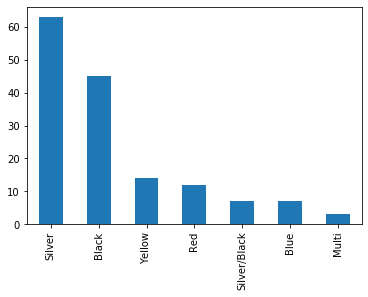

In [10]:
imputed.Color_imputed.value_counts().plot.bar()

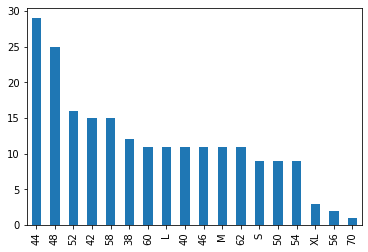

In [11]:
pp_df.Size.value_counts().plot.bar()

In [12]:
#Handling missing values of column Size with Datawig library

df_train, df_test = datawig.utils.random_split(pp_df, split_ratios=[0.7, 0.3])

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    # column(s) containing information about the column we want to impute
    input_columns=['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag','SafetyStockLevel','ReorderPoint','StandardCost',
                  'ListPrice', 'DaysToManufacture'], 
    output_column='Size', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed2 = imputer.predict(df_test)

In [13]:
imputed2[['Size', 'Size_imputed', 'Size_imputed_proba']]

,Size,Size_imputed,Size_imputed_proba
95,None,58,0.831864
67,None,58,0.877791
322,None,52,0.538822
96,None,58,0.910740
22,None,58,0.916949
254,44,44,0.949953
244,44,44,0.699331
390,62,44,0.558712
357,M,L,0.709824
159,None,58,0.502475


In [14]:
#Accuracy of the model
print('Average accuracy of the model: ', imputed2.Size_imputed_proba.mean())
print('Median accuracy of the model: ', imputed2.Size_imputed_proba.median())

Average accuracy of the model:  0.7419217049286065
Median accuracy of the model:  0.7652920484542847


In [15]:
imputed2.sample()

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,Size,SizeUnitMeasureCode,WeightUnitMeasureCode,Weight,DaysToManufacture,ProductLine,Class,Style,SellStartDate,rowguid,ModifiedDate,Size_imputed,Size_imputed_proba
289,785,"Mountain-300 Black, 38",BK-M47B-38,True,True,Black,100,75,598.4354,1079.99,38,CM,LB,25.35,4,M,M,U,2012-05-30,F06C2CBF-0901-4C08-80ED-FB4E87171B3B,2014-02-08 10:01:36.827,38,0.944133


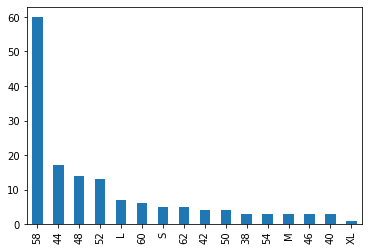

In [16]:
imputed2.Size_imputed.value_counts().plot.bar()

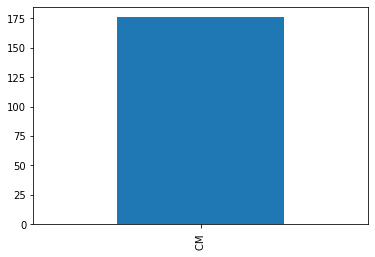

In [17]:
pp_df.SizeUnitMeasureCode.value_counts().plot.bar()

In [18]:
pp_df.SizeUnitMeasureCode.fillna('CM', inplace=True)

In [19]:
pp_df.SizeUnitMeasureCode.value_counts()

CM     328
CM     176
Name: SizeUnitMeasureCode, dtype: int64

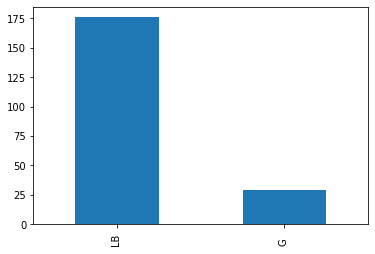

In [20]:
pp_df.WeightUnitMeasureCode.value_counts().plot.bar()

In [21]:
pp_df.WeightUnitMeasureCode.fillna('LB', inplace=True)

In [22]:
pp_df.Weight.median()

17.9

In [23]:
pp_df.Weight.fillna(17.9, inplace=True)

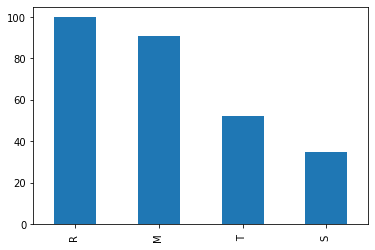

In [24]:
pp_df.ProductLine.value_counts().plot.bar()

In [25]:
#Handling missing values of category ProductLine with Datawig library

df_train, df_test = datawig.utils.random_split(pp_df, split_ratios=[0.7, 0.3])

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    # column(s) containing information about the column we want to impute
    input_columns=['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag','SafetyStockLevel','ReorderPoint','StandardCost',
                  'ListPrice', 'DaysToManufacture'], 
    output_column='ProductLine', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed3 = imputer.predict(df_test)

In [26]:
imputed3[['ProductLine', 'ProductLine_imputed', 'ProductLine_imputed_proba']]

,ProductLine,ProductLine_imputed,ProductLine_imputed_proba
95,None,R,0.998971
67,None,R,0.998753
322,R,R,0.999730
96,None,R,0.997704
22,None,R,0.998714
254,R,R,0.999983
244,M,M,0.999957
390,T,T,0.999889
357,S,S,0.997896
159,None,R,0.994267


In [27]:
#Accuracy of the model
print('Average accuracy of the model: ', imputed3.ProductLine_imputed_proba.mean())
print('Median accuracy of the model: ', imputed3.ProductLine_imputed_proba.median())

Average accuracy of the model:  0.9781907792912413
Median accuracy of the model:  0.9995805621147156


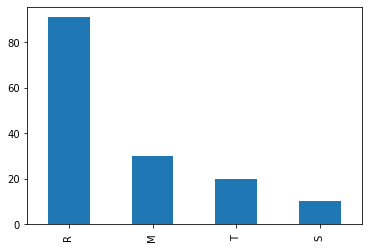

In [28]:
imputed3.ProductLine_imputed.value_counts().plot.bar()

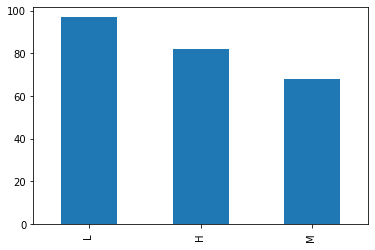

In [29]:
pp_df.Class.value_counts().plot.bar()

In [30]:
#Handling missing values of column Class with Datawig library

df_train, df_test = datawig.utils.random_split(pp_df, split_ratios=[0.7, 0.3])

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    # column(s) containing information about the column we want to impute
    input_columns=['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag','SafetyStockLevel','ReorderPoint','StandardCost',
                  'ListPrice', 'DaysToManufacture'], 
    output_column='Class', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed4 = imputer.predict(df_test)

In [31]:
imputed4[['Class', 'Class_imputed', 'Class_imputed_proba']]

,Class,Class_imputed,Class_imputed_proba
95,None,M,1.000000
67,None,M,1.000000
322,L,L,1.000000
96,None,M,1.000000
22,None,M,1.000000
254,H,H,1.000000
244,H,H,1.000000
390,L,L,1.000000
357,None,L,1.000000
159,None,M,1.000000


In [32]:
#Accuracy of the model
print('Average accuracy of the model: ', imputed4.Class_imputed_proba.mean())
print('Median accuracy of the model: ', imputed4.Class_imputed_proba.median())

Average accuracy of the model:  0.996133682743603
Median accuracy of the model:  1.0


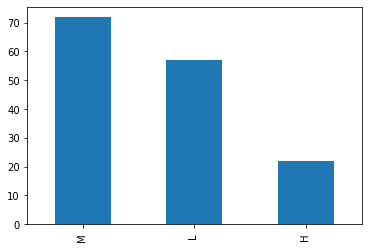

In [33]:
imputed4.Class_imputed.value_counts().plot.bar()

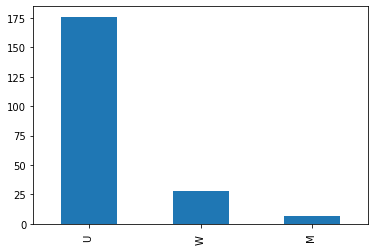

In [34]:
pp_df.Style.value_counts().plot.bar()

In [35]:
#Handling missing values of column Style with Datawig library

df_train, df_test = datawig.utils.random_split(pp_df, split_ratios=[0.7, 0.3])

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    # column(s) containing information about the column we want to impute
    input_columns=['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag','SafetyStockLevel','ReorderPoint','StandardCost',
                  'ListPrice', 'DaysToManufacture'], 
    output_column='Style', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed5 = imputer.predict(df_test)

In [36]:
imputed5[['Style', 'Style_imputed', 'Style_imputed_proba']]

,Style,Style_imputed,Style_imputed_proba
95,None,U,1.000000
67,None,U,1.000000
322,None,U,0.999908
96,None,U,1.000000
22,None,U,1.000000
254,U,U,1.000000
244,U,U,1.000000
390,U,U,0.999994
357,W,W,0.999743
159,None,U,1.000000


In [37]:
#Accuracy of the model
print('Average accuracy of the model: ', imputed5.Style_imputed_proba.mean())
print('Median accuracy of the model: ', imputed5.Style_imputed_proba.median())

Average accuracy of the model:  0.9919170010958286
Median accuracy of the model:  1.0


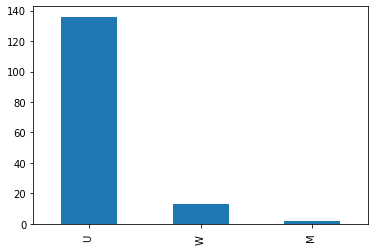

In [38]:
imputed5.Style_imputed.value_counts().plot.bar()

In [39]:
pp_df2 = imputed[['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag','SafetyStockLevel','ReorderPoint','StandardCost', \
                  'ListPrice', 'DaysToManufacture', 'SellStartDate', 'rowguid', 'rowguid']]
color = imputed.Color_imputed
size = imputed2.Size_imputed
product_line = imputed3.ProductLine_imputed
clazz = imputed4.Class_imputed
style = imputed5.Style_imputed

pp_df2['Color'] = color
pp_df2['Size'] = size
pp_df2['ProductLine'] = product_line
pp_df2['Class'] = clazz
pp_df2['Style'] = style

In [40]:
pp_df2.reset_index(inplace=True, drop=True)
pp_df2.head()

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,DaysToManufacture,SellStartDate,rowguid,rowguid,Color,Size,ProductLine,Class,Style
0,417,Internal Lock Washer 6,LI-5160,False,False,1000,750,0.0000,0.000,0,2008-04-30,7F175DFE-1669-4EE9-8EEB-7B55FCE9961C,7F175DFE-1669-4EE9-8EEB-7B55FCE9961C,Silver,58,R,M,U
1,389,Hex Nut 2,HN-5400,False,False,1000,750,0.0000,0.000,0,2008-04-30,17C4B7BA-8574-4EC7-BD3B-7A51ABA61F69,17C4B7BA-8574-4EC7-BD3B-7A51ABA61F69,Silver,58,R,M,U
2,818,LL Road Front Wheel,FW-R623,True,True,500,375,37.9909,85.565,1,2012-05-30,9E66DE78-DECB-438A-B9A9-023C773C60A2,9E66DE78-DECB-438A-B9A9-023C773C60A2,Black,52,R,L,U
3,418,Internal Lock Washer 10,LI-5800,False,False,1000,750,0.0000,0.000,0,2008-04-30,C8323EEC-BDB2-4933-B3C6-24287638AD56,C8323EEC-BDB2-4933-B3C6-24287638AD56,Silver,58,R,M,U
4,342,Flat Washer 6,FW-1200,False,False,1000,750,0.0000,0.000,0,2008-04-30,331ADDEC-E9B9-4A7E-9324-42069C2DCDC4,331ADDEC-E9B9-4A7E-9324-42069C2DCDC4,Silver,58,R,M,U


In [41]:
# Statistics
pp_df2.describe()

,ProductID,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,DaysToManufacture
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,672.258278,562.013245,421.509934,239.350840,410.267715,1.039735
std,234.555167,372.608499,279.456374,412.254581,694.218477,1.427729
min,4.000000,4.000000,3.000000,0.000000,0.000000,0.000000
25%,444.500000,100.000000,75.000000,0.000000,0.000000,0.000000
50%,744.000000,500.000000,375.000000,23.372200,49.990000,1.000000
75%,881.000000,1000.000000,750.000000,352.139400,594.830000,1.000000
max,997.000000,1000.000000,750.000000,2171.294200,3578.270000,4.000000


In [42]:
#1) How many products do we have registered in the system that cost more than 1500 US$?
pp_df2[pp_df2['ListPrice']>1500].count().ListPrice

10

In [43]:
# How many red products are priced between 500 and 1000 dollars?
pp_df2[(pp_df2['Color'] == 'Red') & (pp_df2['ListPrice'].between(500, 1000))].count().ListPrice

4

In [44]:
# How many registered products have the word 'road' in their name?
pp_df2[pp_df2['Name'].str.contains(pat='road',case=False)].count().Name

29

In [45]:
# Filtering values from column SafetyStockLevel between 100 and 501
pp_df2[pp_df2['SafetyStockLevel'].between(100, 501)]

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,DaysToManufacture,SellStartDate,rowguid,rowguid,Color,Size,ProductLine,Class,Style
2,818,LL Road Front Wheel,FW-R623,True,True,500,375,37.9909,85.565,1,2012-05-30,9E66DE78-DECB-438A-B9A9-023C773C60A2,9E66DE78-DECB-438A-B9A9-023C773C60A2,Black,52,R,L,U
5,750,"Road-150 Red, 44",BK-R93R-44,True,True,100,75,2171.2942,3578.270,4,2011-05-31,C19E1136-5DA4-4B40-8758-54A85D7EA494,C19E1136-5DA4-4B40-8758-54A85D7EA494,Red,44,R,H,U
6,740,"HL Mountain Frame - Silver, 44",FR-M94S-44,True,True,500,375,706.8110,1364.500,1,2011-05-31,1909C60C-C490-411D-B3E6-12DDD7832482,1909C60C-C490-411D-B3E6-12DDD7832482,Silver,44,M,H,U
7,886,"LL Touring Frame - Yellow, 62",FR-T67Y-62,True,True,500,375,199.8519,333.420,1,2013-05-30,8D4D52A6-8ABC-4C05-BE4D-C067FAF1A64E,8D4D52A6-8ABC-4C05-BE4D-C067FAF1A64E,Yellow,44,T,L,U
12,680,"HL Road Frame - Black, 58",FR-R92B-58,True,True,500,375,1059.3100,1431.500,1,2008-04-30,43DD68D6-14A4-461F-9069-55309D90EA7E,43DD68D6-14A4-461F-9069-55309D90EA7E,Red,58,R,H,U
13,956,"Touring-1000 Yellow, 54",BK-T79Y-54,True,True,100,75,1481.9379,2384.070,4,2013-05-30,1220B0F0-064D-46B7-8507-1FA758B77B9C,1220B0F0-064D-46B7-8507-1FA758B77B9C,Yellow,54,T,H,U
14,900,"LL Touring Frame - Yellow, 50",FR-T67Y-50,True,True,500,375,199.8519,333.420,1,2013-05-30,285FD682-C647-49D1-B8F3-368A43C9CDA0,285FD682-C647-49D1-B8F3-368A43C9CDA0,Yellow,50,T,L,U
17,729,"LL Road Frame - Red, 60",FR-R38R-60,True,True,500,375,187.1571,337.220,1,2011-05-31,1784BB14-D1F5-4B24-92DA-9127AD179302,1784BB14-D1F5-4B24-92DA-9127AD179302,Red,60,R,L,U
18,833,"ML Road Frame-W - Yellow, 40",FR-R72Y-40,True,True,500,375,360.9428,594.830,1,2012-05-30,22DF26F2-60BC-493E-A14A-5500633E9F7E,22DF26F2-60BC-493E-A14A-5500633E9F7E,Yellow,44,R,M,W
20,904,"ML Mountain Frame-W - Silver, 40",FR-M63S-40,True,True,500,375,199.3757,364.090,1,2013-05-30,A7DDE43E-F7D5-4075-A0C1-C866AD7AA154,A7DDE43E-F7D5-4075-A0C1-C866AD7AA154,Silver,46,M,M,W


In [46]:
# Filtering only two specific values (100 and 500) from column SafetyStockLevel
pp_df2[pp_df2['SafetyStockLevel'].isin([100,500])]

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,DaysToManufacture,SellStartDate,rowguid,rowguid,Color,Size,ProductLine,Class,Style
2,818,LL Road Front Wheel,FW-R623,True,True,500,375,37.9909,85.565,1,2012-05-30,9E66DE78-DECB-438A-B9A9-023C773C60A2,9E66DE78-DECB-438A-B9A9-023C773C60A2,Black,52,R,L,U
5,750,"Road-150 Red, 44",BK-R93R-44,True,True,100,75,2171.2942,3578.270,4,2011-05-31,C19E1136-5DA4-4B40-8758-54A85D7EA494,C19E1136-5DA4-4B40-8758-54A85D7EA494,Red,44,R,H,U
6,740,"HL Mountain Frame - Silver, 44",FR-M94S-44,True,True,500,375,706.8110,1364.500,1,2011-05-31,1909C60C-C490-411D-B3E6-12DDD7832482,1909C60C-C490-411D-B3E6-12DDD7832482,Silver,44,M,H,U
7,886,"LL Touring Frame - Yellow, 62",FR-T67Y-62,True,True,500,375,199.8519,333.420,1,2013-05-30,8D4D52A6-8ABC-4C05-BE4D-C067FAF1A64E,8D4D52A6-8ABC-4C05-BE4D-C067FAF1A64E,Yellow,44,T,L,U
12,680,"HL Road Frame - Black, 58",FR-R92B-58,True,True,500,375,1059.3100,1431.500,1,2008-04-30,43DD68D6-14A4-461F-9069-55309D90EA7E,43DD68D6-14A4-461F-9069-55309D90EA7E,Red,58,R,H,U
13,956,"Touring-1000 Yellow, 54",BK-T79Y-54,True,True,100,75,1481.9379,2384.070,4,2013-05-30,1220B0F0-064D-46B7-8507-1FA758B77B9C,1220B0F0-064D-46B7-8507-1FA758B77B9C,Yellow,54,T,H,U
14,900,"LL Touring Frame - Yellow, 50",FR-T67Y-50,True,True,500,375,199.8519,333.420,1,2013-05-30,285FD682-C647-49D1-B8F3-368A43C9CDA0,285FD682-C647-49D1-B8F3-368A43C9CDA0,Yellow,50,T,L,U
17,729,"LL Road Frame - Red, 60",FR-R38R-60,True,True,500,375,187.1571,337.220,1,2011-05-31,1784BB14-D1F5-4B24-92DA-9127AD179302,1784BB14-D1F5-4B24-92DA-9127AD179302,Red,60,R,L,U
18,833,"ML Road Frame-W - Yellow, 40",FR-R72Y-40,True,True,500,375,360.9428,594.830,1,2012-05-30,22DF26F2-60BC-493E-A14A-5500633E9F7E,22DF26F2-60BC-493E-A14A-5500633E9F7E,Yellow,44,R,M,W
20,904,"ML Mountain Frame-W - Silver, 40",FR-M63S-40,True,True,500,375,199.3757,364.090,1,2013-05-30,A7DDE43E-F7D5-4075-A0C1-C866AD7AA154,A7DDE43E-F7D5-4075-A0C1-C866AD7AA154,Silver,46,M,M,W


In [47]:
#2) How many people do we have with a LastName that starts with the letter P ?
ppe_df = pd.read_sql_query('SELECT * FROM Person.Person', conn)
ppe_df.head()

,BusinessEntityID,PersonType,NameStyle,Title,FirstName,MiddleName,LastName,Suffix,EmailPromotion,AdditionalContactInfo,Demographics,rowguid,ModifiedDate
0,1,EM,False,None,Ken,J,Sánchez,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",92C4279F-1207-48A3-8448-4636514EB7E2,2009-01-07
1,2,EM,False,None,Terri,Lee,Duffy,None,1,None,"<IndividualSurvey xmlns=""http://schemas.micros...",D8763459-8AA8-47CC-AFF7-C9079AF79033,2008-01-24
2,3,EM,False,None,Roberto,None,Tamburello,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",E1A2555E-0828-434B-A33B-6F38136A37DE,2007-11-04
3,4,EM,False,None,Rob,None,Walters,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",F2D7CE06-38B3-4357-805B-F4B6B71C01FF,2007-11-28
4,5,EM,False,Ms.,Gail,A,Erickson,None,0,None,"<IndividualSurvey xmlns=""http://schemas.micros...",F3A3F6B4-AE3B-430C-A754-9F2231BA6FEF,2007-12-30


In [48]:
ppe_df[ppe_df['LastName'].str.startswith('P')].count().LastName

1187

In [49]:
# How many unique cities are our customers registered?
#SELECT COUNT (DISTINCT City) from Person.Address
pa_df = pd.read_sql_query('SELECT AddressID, AddressLine1, AddressLine2, City, StateProvinceID, \
                          PostalCode, ModifiedDate FROM Person.Address', conn)
pa_df.head()

,AddressID,AddressLine1,AddressLine2,City,StateProvinceID,PostalCode,ModifiedDate
0,1,1970 Napa Ct.,None,Bothell,79,98011,2007-12-04
1,2,9833 Mt. Dias Blv.,None,Bothell,79,98011,2008-11-30
2,3,7484 Roundtree Drive,None,Bothell,79,98011,2013-03-07
3,4,9539 Glenside Dr,None,Bothell,79,98011,2009-02-03
4,5,1226 Shoe St.,None,Bothell,79,98011,2008-12-19


In [50]:
pa_df['City'].nunique()

575

In [51]:
# What are the unique cities that we have registered in our system?
#SELECT DISTINCT City from Person.Address
pa_df['City'].unique()

array(['Bothell', 'Portland', 'Seattle', 'Duluth', 'Dallas',
       'San Francisco', 'Nevada', 'Phoenix', 'Memphis', 'Orlando',
       'Ottawa', 'Montreal', 'Calgary', 'Bordeaux', 'Berlin', 'Melbourne',
       'Cambridge', 'Detroit', 'Kenmore', 'Snohomish', 'Monroe', 'Duvall',
       'Carnation', 'Edmonds', 'Bellevue', 'Sammamish', 'Redmond',
       'Everett', 'Newport Hills', 'Gold Bar', 'Index', 'Issaquah',
       'Renton', 'Santa Cruz', 'Lynnwood', 'Altadena', 'West Covina',
       'Torrance', 'Burbank', 'Lebanon', 'Port Orchard', 'Bellingham',
       'Mill Valley', 'Lake Oswego', 'Downey', 'Corvallis', 'Los Angeles',
       'Missoula', 'Daly City', 'Newport Beach', 'Atlanta', 'Long Beach',
       'Chicago', 'Berkeley', 'Lakewood', 'Walla Walla', 'Concord',
       'Anacortes', 'Tacoma', 'Burlingame', 'Boise', 'La Mesa', 'W. Linn',
       'Bremerton', 'Denver', 'Lemon Grove', 'New York', 'Oakland',
       'Richmond', 'Novato', 'Chula Vista', 'Salt Lake City', 'Glendale',
       'Palo

In [52]:
pd.DataFrame(pa_df.City.unique())

,0
0,Bothell
1,Portland
2,Seattle
3,Duluth
4,Dallas
...,...
570,Chatou
571,Royal Oak
572,Metchosin
573,San Carlos
